In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import requests 
import time 


import os
import csv
import matplotlib.pyplot as plt
import itertools as it
from matplotlib import cm
 
    
    # because you never know...


# Output File (CSV)
%cd "C:\Users\kwlei\Documents\GitHub\WeatherReport"
output_data_file = "output_data/cities.csv"

# Import API key
from api_key import api_key 
from citipy import citipy 


  #  Range of latitudes and longitudes
  #  lat_range = (-58, 73)
  #  lng_range = (-180, 180)


# produce some output 
print("some output")

C:\Users\kwlei\Documents\GitHub\WeatherReport
some output


In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


#  utu /watch?v=AVF-HyplZqo @ T:s=300

cityGrab_df = pd.DataFrame(cities, columns=["NAME"])
cityGrab_df.to_csv('cityGrab.csv', index=False)




# Print the city count to confirm sufficient count
# len(cities) 
len(cities) 


618

In [9]:
# Starting URL for Weather Map API Call
api_key = "7bedea6925812000099cef9c945868ec"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "MaxTemp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind, 
                          "Country": city_country, 
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | kaitangata
Processing Record 3 of Set 1 | manta
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | kano
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | nova zagora
Processing Record 13 of Set 1 | jiwani
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | nuuk
Processing Record 19 of Set 1 | bilma
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set

Processing Record 35 of Set 4 | acapulco
Processing Record 36 of Set 4 | celestun
Processing Record 37 of Set 4 | tecoanapa
Processing Record 38 of Set 4 | gohpur
Processing Record 39 of Set 4 | tilichiki
Processing Record 40 of Set 4 | nguiu
City not found. Skipping...
Processing Record 41 of Set 4 | souillac
Processing Record 42 of Set 4 | tomakomai
Processing Record 43 of Set 4 | saskylakh
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | rio grande
Processing Record 46 of Set 4 | santa cruz
Processing Record 47 of Set 4 | port-gentil
Processing Record 48 of Set 4 | aloleng
Processing Record 49 of Set 4 | nhulunbuy
Processing Record 0 of Set 5 | paducah
Processing Record 1 of Set 5 | narsaq
Processing Record 2 of Set 5 | talnakh
Processing Record 3 of Set 5 | biltine
Processing Record 4 of Set 5 | plettenberg bay
Processing Record 5 of Set 5 | daura
Processing Record 6 of Set 5 | port macquarie
Processing Record 7 of Set 5 | bubaque
Processing Record 8 of Set 

Processing Record 20 of Set 8 | sembakung
Processing Record 21 of Set 8 | svetlyy
City not found. Skipping...
Processing Record 22 of Set 8 | havoysund
Processing Record 23 of Set 8 | ayan
Processing Record 24 of Set 8 | jacareacanga
Processing Record 25 of Set 8 | safaga
City not found. Skipping...
Processing Record 26 of Set 8 | sidi ali
Processing Record 27 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 28 of Set 8 | tadepalle
Processing Record 29 of Set 8 | natitingou
Processing Record 30 of Set 8 | montrose
Processing Record 31 of Set 8 | mkuranga
Processing Record 32 of Set 8 | karaul
City not found. Skipping...
Processing Record 33 of Set 8 | senneterre
Processing Record 34 of Set 8 | caravelas
Processing Record 35 of Set 8 | dwarka
Processing Record 36 of Set 8 | sampit
Processing Record 37 of Set 8 | krasnaya zarya
Processing Record 38 of Set 8 | husavik
Processing Record 39 of Set 8 | asau
City not found. Skipping...
Processing Record 40 of Set 8 | san c

Processing Record 0 of Set 12 | abonnema
Processing Record 1 of Set 12 | kimbe
Processing Record 2 of Set 12 | south valley
Processing Record 3 of Set 12 | saint-georges
Processing Record 4 of Set 12 | camacha
Processing Record 5 of Set 12 | los andes
Processing Record 6 of Set 12 | kirando
Processing Record 7 of Set 12 | njombe
Processing Record 8 of Set 12 | abnub
Processing Record 9 of Set 12 | khandyga
Processing Record 10 of Set 12 | capitan bado
Processing Record 11 of Set 12 | sechura
Processing Record 12 of Set 12 | markova
Processing Record 13 of Set 12 | nichinan
Processing Record 14 of Set 12 | panzhihua
Processing Record 15 of Set 12 | nome
Processing Record 16 of Set 12 | taga
Processing Record 17 of Set 12 | saint-pierre
Processing Record 18 of Set 12 | montpellier
Processing Record 19 of Set 12 | nyirbeltek
Processing Record 20 of Set 12 | nioro
Processing Record 21 of Set 12 | sao raimundo das mangabeiras
Processing Record 22 of Set 12 | northam
Processing Record 23 of 

In [22]:
city_data_pd = pd.DataFrame(city_data)

city_weather13_df = pd.DataFrame(city_data)
city_weather13_df['absLat'] = city_weather13_df['Lat'].abs()
city_weather13_df.to_csv('CityWeather13.csv', index=False)
# lats = city_data_pd["Lat"] 

city_weather12_df.tail(12)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,Wind Speed,absLat
543,marawi,97,PH,1570214785,85,8.00,124.29,73.99,5.99,8.00
544,katobu,12,ID,1570214785,84,-4.94,122.53,71.72,3.17,4.94
545,shaturtorf,100,RU,1570214785,92,55.57,39.42,47.42,4.16,55.57
546,esperance,90,AU,1570214785,63,-33.86,121.89,60.80,8.05,33.86
547,almeria,0,ES,1570214786,88,36.84,-2.46,73.00,2.24,36.84
548,constitucion,40,MX,1570214786,52,23.99,-104.67,72.00,7.81,23.99
549,genhe,0,CN,1570214786,74,50.78,121.52,26.72,2.72,50.78
550,wana,0,PK,1570214786,80,32.31,69.59,50.30,3.40,32.31
551,uruguaiana,90,BR,1570214787,93,-29.77,-57.08,66.20,8.05,29.77
552,troitskoye,70,RU,1570214787,44,52.98,84.68,42.38,5.39,52.98


In [25]:
city_weather12_df.dtypes


City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
MaxTemp       float64
Wind Speed    float64
absLat        float64
dtype: object

In [13]:
city_weather12 = "CityWeather12.csv" 
city_weather12_df = pd.read_csv(city_weather12)

city_weather12_df.rename(columns = {'Wind Speed':'WindSpeed'},inplace=True)

Text(0.5, 1.0, 'd(Equator) X Wind Speed')

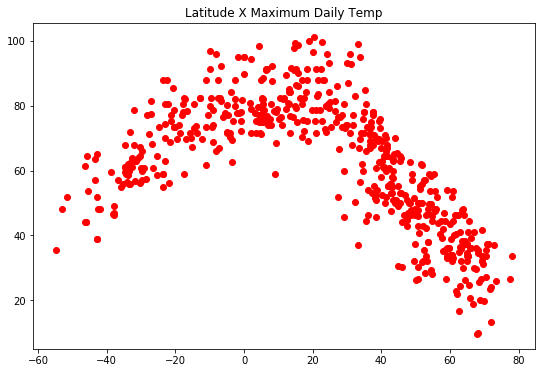

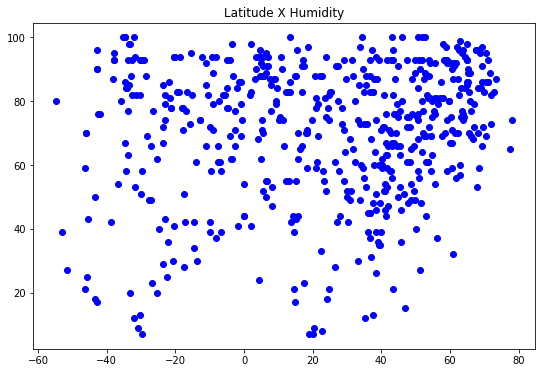

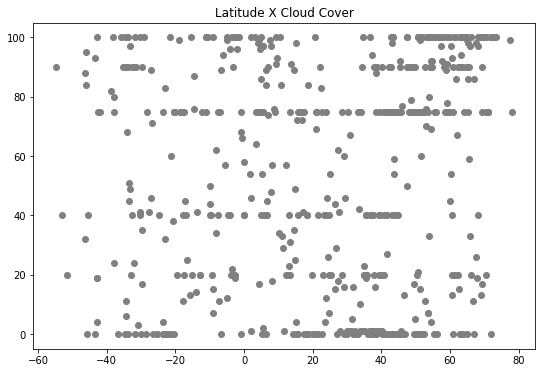

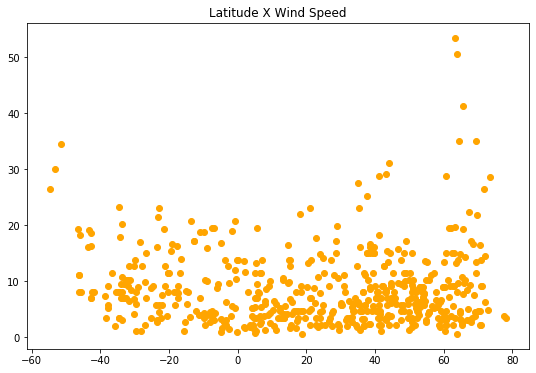

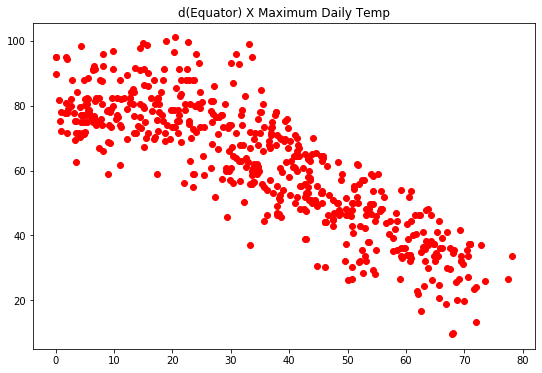

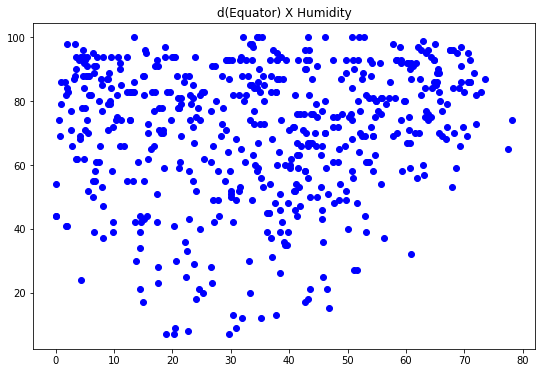

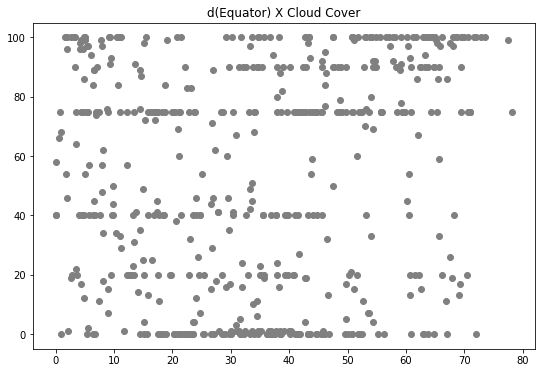

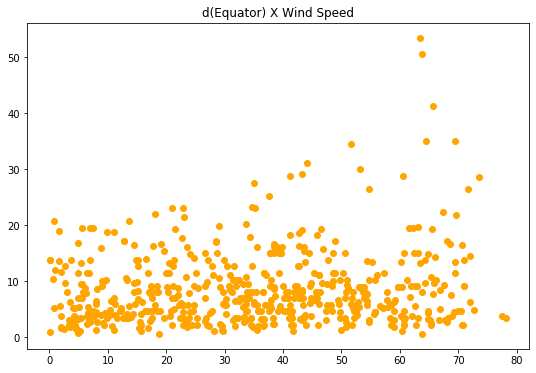

In [6]:



# Dependencies and Setup
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import requests 
import time 


import os
import csv
import matplotlib.pyplot as plt
import itertools as it
from matplotlib import cm

city_weather12 = "CityWeather12.csv" 
city_weather12_df = pd.read_csv(city_weather12)

city_weather12_df.rename(columns = {'Wind Speed':'WindSpeed'},inplace=True)


plt.figure(figsize=(9,6))
plt.scatter(city_weather12_df.Lat, city_weather12_df.MaxTemp, color= 'red')
plt.title("Latitude X Maximum Daily Temp")

plt.figure(figsize=(9,6))
plt.scatter(city_weather12_df.Lat, city_weather12_df.Humidity, color= 'blue')
plt.title("Latitude X Humidity")

plt.figure(figsize=(9,6))
plt.scatter(city_weather12_df.Lat, city_weather12_df.Cloudiness, color = 'grey') 
plt.title("Latitude X Cloud Cover")

plt.figure(figsize=(9,6))
plt.scatter(city_weather12_df.Lat, city_weather12_df.WindSpeed, color= 'orange')
plt.title("Latitude X Wind Speed")

plt.figure(figsize=(9,6))
plt.scatter(city_weather12_df.absLat, city_weather12_df.MaxTemp, color= 'red')
plt.title("d(Equator) X Maximum Daily Temp")

plt.figure(figsize=(9,6))
plt.scatter(city_weather12_df.absLat, city_weather12_df.Humidity, color= 'blue')
plt.title("d(Equator) X Humidity")

plt.figure(figsize=(9,6))
plt.scatter(city_weather12_df.absLat, city_weather12_df.Cloudiness, color = 'grey') 
plt.title("d(Equator) X Cloud Cover")

plt.figure(figsize=(9,6))
plt.scatter(city_weather12_df.absLat, city_weather12_df.WindSpeed, color= 'orange')
plt.title("d(Equator) X Wind Speed")








In [38]:
# sphinx_gallery_thumbnail_number = 2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

In [39]:
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

In [40]:
cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

In [41]:
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

In [42]:
cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

In [ ]:
cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

In [43]:
cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

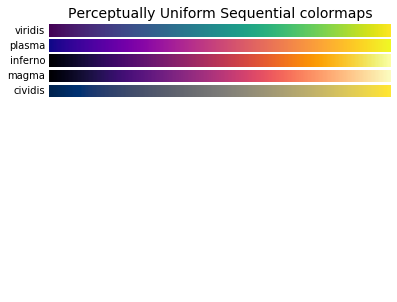

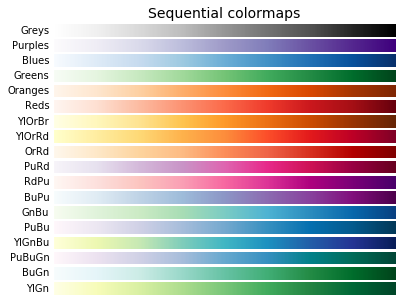

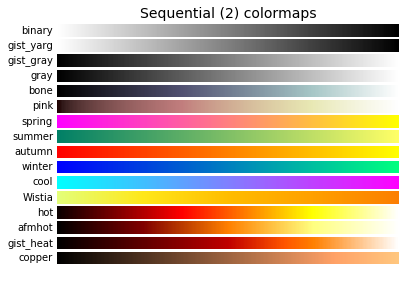

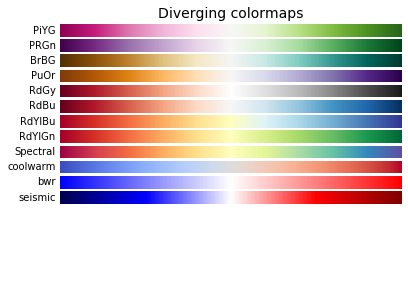

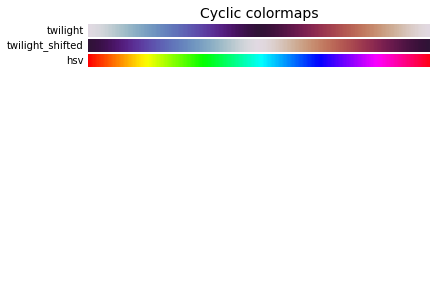

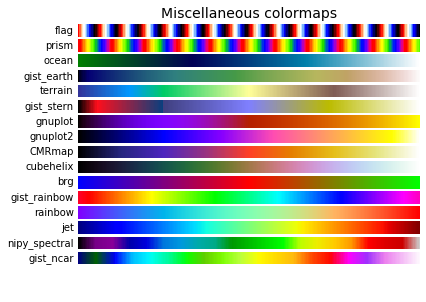

In [44]:
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

AttributeError: 'PathCollection' object has no property 'colormap'

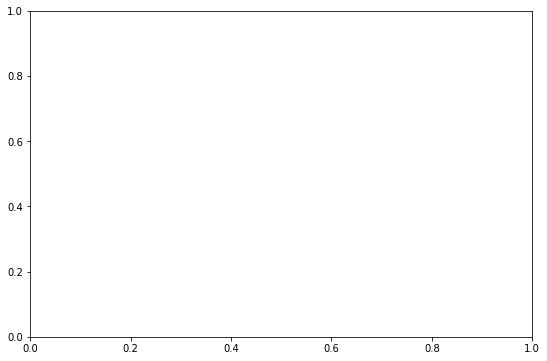

In [46]:



plt.figure(figsize=(9,6))
plt.scatter(city_weather12_df.Lat, city_weather12_df.MaxTemp, colormap='seismic')